## **Training a RaceCar using RL - PPO - DummyVecEnv**
https://gymnasium.farama.org/environments/box2d/car_racing/

### **1. Import dependencies**

In [1]:
# Install swig
# pip install box2d pyglet

In [1]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


### **2. Test Environment**

In [5]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name, render_mode='human')

In [21]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], shape=(96, 96, 3), dtype=uint8),
 {})

In [22]:
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

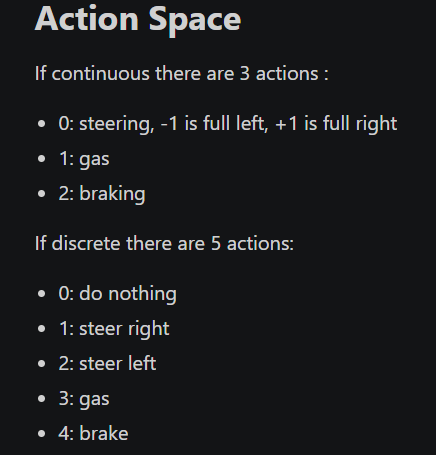

In [23]:
from PIL import Image
from IPython.display import display

image_path = 'Images/action_space_racecar.png'
display(Image.open(image_path))

In [24]:
env.observation_space

Box(0, 255, (96, 96, 3), uint8)

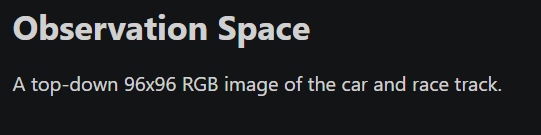

In [25]:
from PIL import Image
from IPython.display import display

image_path = 'Images/observation_space_racecar.png'
display(Image.open(image_path))

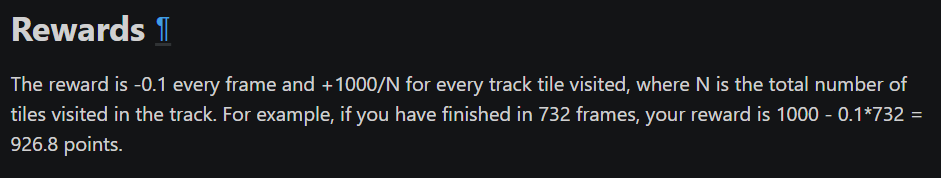

In [26]:
from PIL import Image
from IPython.display import display

image_path = 'Images/reward_racecar.png'
display(Image.open(image_path))

In [27]:
env.render()

In [28]:
env.close()

In [6]:
episodes = 1
for i in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        action = env.action_space.sample()
        n_state, reward, truncated, termimated, info = env.step(action)
        score += reward

        # Custom termination: if car goes off-road (green pixels in observation)
        if (n_state[:, :, 1] > 200).sum() > 500:  # crude check: too much green
            terminated = True  

        done = truncated or termimated
    print('Episode:{} Score:{}'.format(i, score))
env.close()

Episode:1 Score:-30.313588850174632


In [32]:
env??

Type:           TimeLimit
String form:    <TimeLimit<OrderEnforcing<PassiveEnvChecker<CarRacing<CarRacing-v3>>>>>
File:           d:\sem 5\ml\package\venv\lib\site-packages\gymnasium\wrappers\common.py
Source:        
class TimeLimit(
    gym.Wrapper[ObsType, ActType, ObsType, ActType], gym.utils.RecordConstructorArgs
):
    """Limits the number of steps for an environment through truncating the environment if a maximum number of timesteps is exceeded.

    If a truncation is not defined inside the environment itself, this is the only place that the truncation signal is issued.
    Critically, this is different from the `terminated` signal that originates from the underlying environment as part of the MDP.
    No vector wrapper exists.

    Example using the TimeLimit wrapper:
        >>> from gymnasium.wrappers import TimeLimit
        >>> from gymnasium.envs.classic_control import CartPoleEnv

        >>> spec = gym.spec("CartPole-v1")
        >>> spec.max_episode_steps
        500
 

### **3. Train Model**

#### Play as Human

In [ ]:
# python gymnasium/envs/box2d/car_racing.py
#  python venv/lib/site-packages/gymnasium/envs/box2d/car_racing.py

In [37]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name) # render_mode='human' --> Not given to speed up the training
env = DummyVecEnv([lambda: env])

In [38]:
log_path = os.path.join('Training', 'Logs')
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [31]:
model.learn(total_timesteps=1_000_000)

Logging to Training\Logs\PPO_16
-----------------------------
| time/              |      |
|    fps             | 83   |
|    iterations      | 1    |
|    time_elapsed    | 24   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 79          |
|    iterations           | 2           |
|    time_elapsed         | 51          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009446194 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.24       |
|    explained_variance   | -0.00278    |
|    learning_rate        | 0.0003      |
|    loss                 | 0.215       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0104     |
|    std                  | 0.989       |
|    value_loss           | 0.737       |
--

### **4. Save Model**

In [35]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_1MD_CarRacing_Model')

In [32]:
model.save(ppo_path)

del model

model = PPO.load(ppo_path, env=env)

Wrapping the env in a VecTransposeImage.


### **5. Evaluate Model**

In [43]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name, render_mode='human')

ppo_path = os.path.join('Training', 'Saved Models', 'PPO_1MD_CarRacing_Model')
model = PPO.load(ppo_path, env=env)

rwd, std = evaluate_policy(model, env, n_eval_episodes=1, render=True)

env.close()

rwd, std

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


d:\SEM 5\ML\Package\venv\Lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(np.float64(-40.06309078633785), np.float64(0.0))

## **Training a RaceCar using RL - PPO - SupProcVecEnv**

### **1. Import dependencies**

In [1]:
import os
import gymnasium as gym
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


### **2. Creating SupProcVecEnv**

In [2]:
def make_env():
    def _init():
        env = gym.make("CarRacing-v3", render_mode='human')  # no render_mode here (slows training)
        env = Monitor(env)              # logs reward/episode length
        return env
    return _init

In [3]:
num_envs = 8   # adjust based on your CPU
env = SubprocVecEnv([make_env() for _ in range(num_envs)])

In [4]:
log_path = os.path.join("Training", "Logs")

model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


### **3. Train & Save Model**

In [6]:
env.close()

In [ ]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_491k_CarRacing_Model')

model.learn(total_timesteps=491520)
model.save(ppo_path)

### **4. Test Model**

In [48]:
test_env = gym.make("CarRacing-v3", render_mode="human")

# Load trained model (PPO or SAC depending on what you trained)
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_491k_CarRacing_Model')
model = PPO.load(ppo_path, env=test_env)

obs, info = test_env.reset()
done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated

test_env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [13]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name, render_mode='human')

ppo_path = os.path.join('Training', 'Saved Models', 'PPO_1M_CarRacing_Model')
model = PPO.load(ppo_path, env=env)

rew, std = evaluate_policy(model, env, n_eval_episodes=1, render=True)

env.close()

rew,std

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


(np.float64(180.70175787061453), np.float64(0.0))

## **Training a RaceCar using RL - PPO - SupProcVecEnv - Obstacle**

### Practice 

In [1]:
import os
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from gymnasium.envs.box2d.car_racing import CarRacing

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
d:\GITHUB\RaceCar_RL\venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [2]:
enviroment_name = 'CarRacing-v3'
log_path = os.path.join("Training", "Logs")
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_491k_CarRacing_Model')
ppo_save_path = os.path.join('Training', 'Saved Models', 'PPO_491k_CarRacing_Model')

In [ ]:
def make_env():
    def _init():
        env = gym.make(enviroment_name)
        env = Monitor(env)
        return env
    return _init


num_envs = 8   # adjust based on your CPU
env = SubprocVecEnv([make_env() for _ in range(num_envs)])

model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=491520)
model.save(ppo_save_path)

In [ ]:
env = gym.make(enviroment_name, render_mode='human')

model = PPO.load(ppo_path, env=env)

rew, std = evaluate_policy(model, env, n_eval_episodes=1, render=True)

env.close()

rew,std

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


(np.float64(169.5652053654194), np.float64(0.0))

### Main - v1

In [1]:
import numpy as np
import gymnasium as gym
from gymnasium.envs.box2d.car_racing import CarRacing

class CarRacingObstacles(CarRacing):
    def __init__(
        self,
        obstacle_count=6,
        obstacle_radius=6.0,          # world units, comparable to road width
        collision_penalty=-15.0,      # strong negative reward on hit
        proximity_lambda=0.2,         # smooth shaping strength
        terminate_on_collision=True,
        lateral_jitter=3.5,           # random offset from centerline
        **kwargs
    ):
        super().__init__(**kwargs)
        self.obstacle_count = int(obstacle_count)
        self.obstacle_radius = float(obstacle_radius)
        self.collision_penalty = float(collision_penalty)
        self.proximity_lambda = float(proximity_lambda)
        self.terminate_on_collision = bool(terminate_on_collision)
        self.lateral_jitter = float(lateral_jitter)
        self.obstacles = []

    def reset(self, **kwargs):
        obs, info = super().reset(**kwargs)
        self._place_obstacles()
        return obs, info

    def _place_obstacles(self):
        """
        Use self.track entries: (idx, angle, cx, cy).
        Sample a set of center points and add a small lateral jitter
        so obstacles are slightly off the centerline but still on-road.
        """
        self.obstacles = []
        # Guard: if track not ready or too short
        if not hasattr(self, "track") or len(self.track) < 20:
            return
        # Evenly spaced indices, skip ends to avoid spawn/finish zones
        idxs = np.linspace(10, len(self.track) - 10, num=self.obstacle_count, dtype=int)
        for i in idxs:
            _, angle, cx, cy = self.track[i]
            # Unit lateral vector (normal to heading)
            lateral = np.array([np.cos(angle), np.sin(angle)])
            # Jitter left/right within road width range
            offset = np.random.uniform(-self.lateral_jitter, self.lateral_jitter)
            pos = np.array([cx, cy]) + offset * lateral
            self.obstacles.append((float(pos[0]), float(pos[1])))

    def step(self, action):
        obs, reward, terminated, truncated, info = super().step(action)

        # If no obstacles, return as-is
        if not self.obstacles or not hasattr(self.car, "hull"):
            return obs, reward, terminated, truncated, info

        car_pos = np.array(self.car.hull.position, dtype=np.float32)
        # Compute nearest obstacle distance
        dists = [np.linalg.norm(car_pos - np.array([ox, oy], dtype=np.float32))
                 for (ox, oy) in self.obstacles]
        min_d = min(dists) if dists else np.inf

        # Collision handling
        if min_d <= self.obstacle_radius:
            reward += self.collision_penalty
            info = dict(info)
            info["collision"] = True
            if self.terminate_on_collision:
                terminated = True

        # Proximity shaping within (R, 2R)
        elif min_d < 2.0 * self.obstacle_radius and self.proximity_lambda > 0.0:
            shaping = -self.proximity_lambda * (2.0 * self.obstacle_radius - min_d) / self.obstacle_radius
            reward += shaping

        return obs, reward, terminated, truncated, info

    # VISUAL OVERLAY: draw obstacles on the same surface as the road
    def _render_road(self, zoom, translation, angle):
        # draw default background, grass, and road
        super()._render_road(zoom, translation, angle)
        # draw obstacles as filled polygons (orange cones)
        if not self.obstacles:
            return
        color = (255, 165, 0)  # orange
        # approximate circle with a 12-gon in world coords, then transformed by base method
        n = 12
        for (ox, oy) in self.obstacles:
            pts = []
            for k in range(n):
                th = 2.0 * np.pi * k / n
                px = ox + self.obstacle_radius * np.cos(th)
                py = oy + self.obstacle_radius * np.sin(th)
                pts.append((px, py))
            # draw onto self.surf using the same transform the env uses for road polygons
            self._draw_colored_polygon(self.surf, pts, color, zoom, translation, angle)

    @property
    def obstacle_list(self):
        # Convenience accessor for visualization/debugging
        return list(self.obstacles)


d:\GITHUB\RaceCar_RL\venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [2]:
from stable_baselines3.common.monitor import Monitor

def make_env():
    def _init():
        # domain_randomize optional; continuous=True by default
        env = CarRacingObstacles(
            obstacle_count=6,
            obstacle_radius=1.0,
            collision_penalty = -15.0,
            proximity_lambda = 0.3,
            terminate_on_collision=True,
            domain_randomize=False,    # set True if using color randomization
            continuous=True,
        )
        return Monitor(env)
    return _init

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [3]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import SubprocVecEnv

log_path = os.path.join("Training", "Logs")
ppo_save_path = os.path.join("Training", "Saved Models", "PPO_500k1_CarRacingObstacles_Model")
tensorboard_log=log_path

num_envs = 8
venv = SubprocVecEnv([make_env() for _ in range(num_envs)])
model = PPO("CnnPolicy", venv, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=500_000)
model.save(ppo_save_path)

In [ ]:
# Evaluate
eval_env = CarRacingObstacles(render_mode='human')
obs, info = eval_env.reset()
done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, r, terminated, truncated, info = eval_env.step(action)
    done = terminated or truncated
eval_env.close()

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

eval_env = CarRacingObstacles(render_mode='human')
model = PPO.load("Training\\Saved Models\\PPO_500k_CarRacingObstacles_Model", env=eval_env)
rew, std = evaluate_policy(model, eval_env, n_eval_episodes=1, render=True)

eval_env.close()
print(f"Mean reward: {rew:.2f} ± {std:.2f}")

### Main - v2

In [1]:
import numpy as np
import gymnasium as gym
from gymnasium.envs.box2d.car_racing import CarRacing

class CarRacingObstacles(CarRacing):
    def __init__(
        self,
        obstacle_count=6,
        obstacle_radius=6.0,          # world units, comparable to road width
        collision_penalty=-15.0,      # strong negative reward on hit
        proximity_lambda=0.2,         # smooth shaping strength
        terminate_on_collision=True,
        lateral_jitter=3.5,           # random offset from centerline
        **kwargs
    ):
        super().__init__(**kwargs)
        self.obstacle_count = int(obstacle_count)
        self.obstacle_radius = float(obstacle_radius)
        self.collision_penalty = float(collision_penalty)
        self.proximity_lambda = float(proximity_lambda)
        self.terminate_on_collision = bool(terminate_on_collision)
        self.lateral_jitter = float(lateral_jitter)
        self.obstacles = []

    def reset(self, **kwargs):
        obs, info = super().reset(**kwargs)
        self._place_obstacles()
        return obs, info

    def _place_obstacles(self):
        """
        Use self.track entries: (idx, angle, cx, cy).
        Sample a set of center points and add a small lateral jitter
        so obstacles are slightly off the centerline but still on-road.
        """
        self.obstacles = []
        # Guard: if track not ready or too short
        if not hasattr(self, "track") or len(self.track) < 20:
            return
        # Evenly spaced indices, skip ends to avoid spawn/finish zones
        idxs = np.linspace(10, len(self.track) - 10, num=self.obstacle_count, dtype=int)
        for i in idxs:
            _, angle, cx, cy = self.track[i]
            # Unit lateral vector (normal to heading)
            lateral = np.array([np.cos(angle), np.sin(angle)])
            # Jitter left/right within road width range
            offset = np.random.uniform(-self.lateral_jitter, self.lateral_jitter)
            pos = np.array([cx, cy]) + offset * lateral
            self.obstacles.append((float(pos[0]), float(pos[1])))

    def step(self, action):
        obs, reward, terminated, truncated, info = super().step(action)

        # If no obstacles, return as-is
        if not self.obstacles or not hasattr(self.car, "hull"):
            return obs, reward, terminated, truncated, info

        car_pos = np.array(self.car.hull.position, dtype=np.float32)
        # Compute nearest obstacle distance
        dists = [np.linalg.norm(car_pos - np.array([ox, oy], dtype=np.float32))
                 for (ox, oy) in self.obstacles]
        min_d = min(dists) if dists else np.inf

        # Collision handling
        if min_d <= self.obstacle_radius:
            reward += self.collision_penalty
            info = dict(info)
            info["collision"] = True
            if self.terminate_on_collision:
                terminated = True

        # Proximity shaping within (R, 2R)
        elif min_d < 2.0 * self.obstacle_radius and self.proximity_lambda > 0.0:
            shaping = -self.proximity_lambda * (2.0 * self.obstacle_radius - min_d) / self.obstacle_radius
            reward += shaping

        return obs, reward, terminated, truncated, info

    # VISUAL OVERLAY: draw obstacles on the same surface as the road
    def _render_road(self, zoom, translation, angle):
        # draw default background, grass, and road
        super()._render_road(zoom, translation, angle)
        # draw obstacles as filled polygons (orange cones)
        if not self.obstacles:
            return
        color = (255, 165, 0)  # orange
        # approximate circle with a 12-gon in world coords, then transformed by base method
        n = 12
        for (ox, oy) in self.obstacles:
            pts = []
            for k in range(n):
                th = 2.0 * np.pi * k / n
                px = ox + self.obstacle_radius * np.cos(th)
                py = oy + self.obstacle_radius * np.sin(th)
                pts.append((px, py))
            # draw onto self.surf using the same transform the env uses for road polygons
            self._draw_colored_polygon(self.surf, pts, color, zoom, translation, angle)

    @property
    def obstacle_list(self):
        # Convenience accessor for visualization/debugging
        return list(self.obstacles)


d:\GITHUB\RaceCar_RL\venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [2]:
from stable_baselines3.common.monitor import Monitor

def make_env():
    def _init():
        # domain_randomize optional; continuous=True by default
        env = CarRacingObstacles(
            obstacle_count=6,
            obstacle_radius=1.0,
            collision_penalty = -15.0,
            proximity_lambda = 0.3,
            terminate_on_collision=True,
            domain_randomize=False,    # set True if using color randomization
            continuous=True,
        )
        return Monitor(env)
    return _init

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [4]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import SubprocVecEnv

num_envs = 8
venv = SubprocVecEnv([make_env() for _ in range(num_envs)])

In [ ]:
log_path = os.path.join("Training", "Logs")
ppo_save_path = os.path.join("Training", "Saved Models", "PPO_800k_CarRacingObstacles_Model")

model = PPO.load('Training\\Saved Models\\PPO_491k_CarRacing_Model', env=venv, tensorboard_log=log_path)
model.learn(total_timesteps=300_000)
model.save(ppo_save_path)

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy


eval_env = CarRacingObstacles(
    obstacle_count=6,
    obstacle_radius=1.0,
    collision_penalty = -15.0,
    proximity_lambda = 0.3,
    terminate_on_collision=True,
    domain_randomize=False,    # set True if using color randomization
    continuous=True,
    render_mode='human')

model = PPO.load("Training\\Saved Models\\PPO_500k_CarRacingObstacles_Model.zip", env=eval_env)
rew, std = evaluate_policy(model, eval_env, n_eval_episodes=1, render=True)

eval_env.close()
print(f"Mean reward: {rew:.2f} ± {std:.2f}")

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
